* Null Values Counts
* Distributions ,Skewness ,outliers (Continous)
* Categorical Counts (Nominal, Categorical)
* ScatterPlots and Correlation Plots (Continous)
* Boxplots against target variable (Nominal, Categorical)
* distribution of target with  respect to (Nominal, Categorical)
* Summary

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

import time
from dython.nominal import associations

In [37]:
from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
#from scipy.special import boxcox1

In [14]:
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [15]:
# Display numerical correlations (pearson) between features on heatmap.
def correlation(train):
    sns.set(font_scale=1.1)
    correlation_train = train.corr()
    mask = np.triu(correlation_train.corr())
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_train,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)

    plt.show()

In [44]:
def numeric_log_distribution_plot(df):
    """
     Description : Plot countplot for all categorical features 
    present in the dataframe passed
    
    Argument : Dataframe
    """
    nums_train = df.select_dtypes(exclude='object').columns
    for col in nums_train:
        print(df[col].describe())
        plt.rc("figure",figsize=(10,5))
        fig,axes = plt.subplots(1,2)
        plt.title("Distribution of "+col)
        sns.distplot(df[col].dropna(),ax=axes[0],axlabel='original',fit=stats.norm)
        sns.distplot(np.log1p(df[col].dropna()),ax=axes[1],axlabel='logged',fit=stats.norm)
        #sns.distplot(boxcox1p(df[col].dropna(), boxcox_normmax(df[col].dropna() + 1)),ax=axes[1],axlabel='boxcox',fit=scipy.stats.norm)
        #boxcox1p(features[i], boxcox_normmax(features[i] + 1))
        plt.tight_layout()
        plt.show()

In [48]:
def skewness(train):
    skew_df = pd.DataFrame(train.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: stats.skew(train[feature].dropna()))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    return skew_df

In [3]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Null Values Counts

In [17]:
missing

,Total,Percent


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

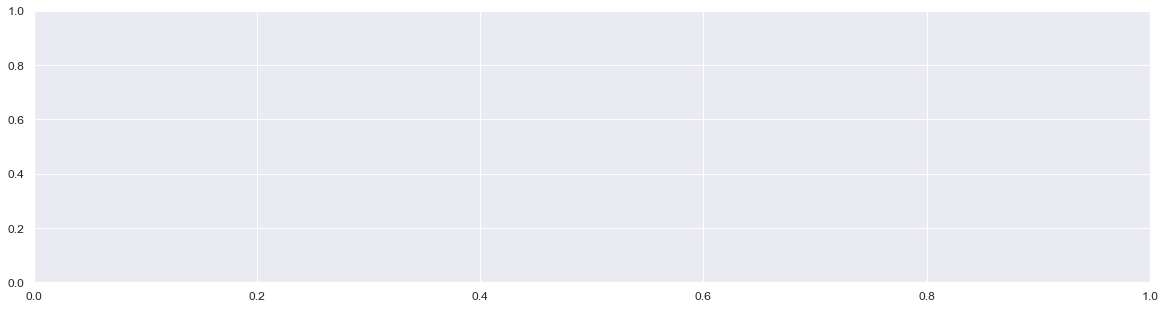

In [16]:
missing = missing_percentage(data)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

In [54]:
cats_data = data.select_dtypes(include='object').columns
cats_data =cats_data.drop('customerID')
nums_data =data.select_dtypes(exclude='object').columns
print('No of data cat_cols : ',len(cats_data))
print('No of data num_cols : ',len(nums_data))

No of data cat_cols :  17
No of data num_cols :  3


In [55]:
cats_data

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
nums_data

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64


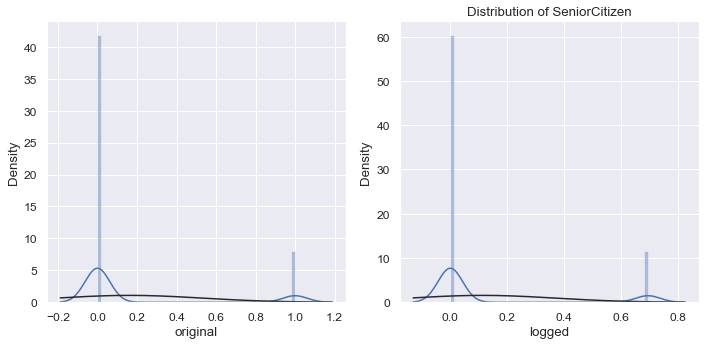

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


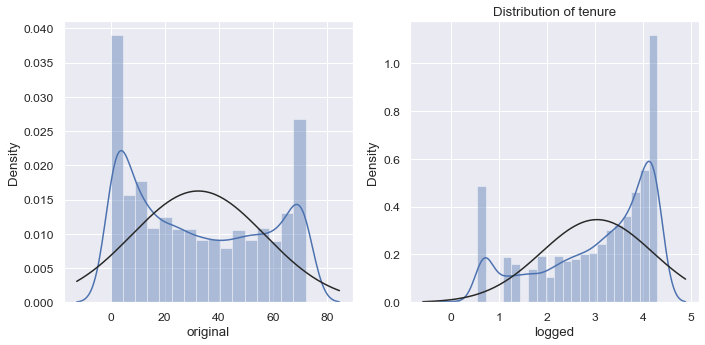

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


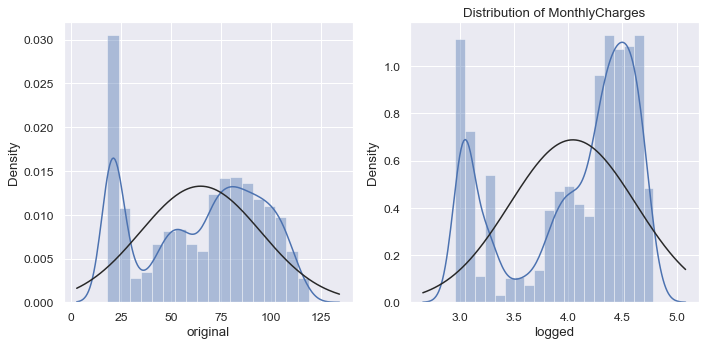

In [45]:
numeric_log_distribution_plot(df=data)

In [49]:
skewness(train=data)

,Feature,Skew,Absolute Skew,Skewed
0,SeniorCitizen,1.833242,1.833242,True
1,tenure,0.239489,0.239489,False
2,MonthlyCharges,-0.220477,0.220477,False


In [53]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


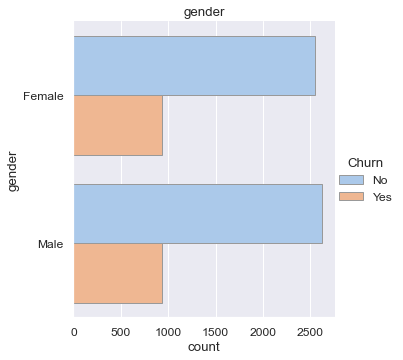

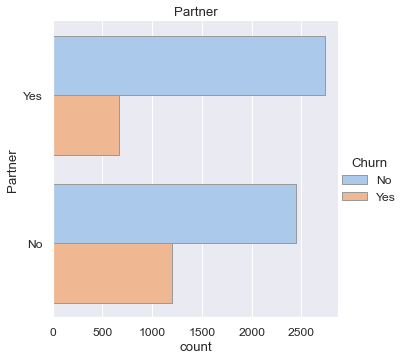

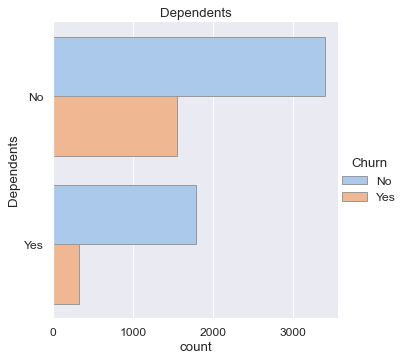

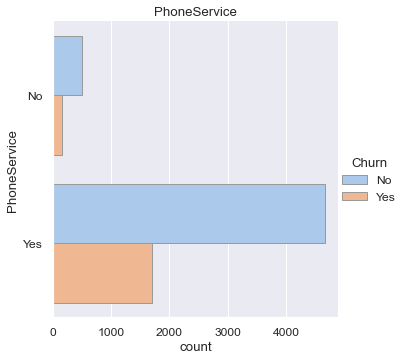

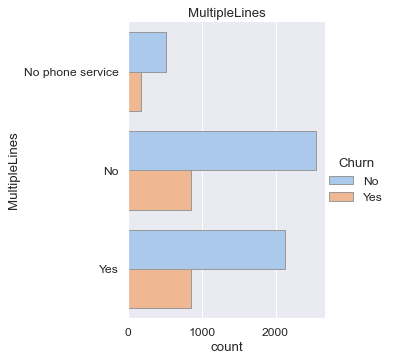

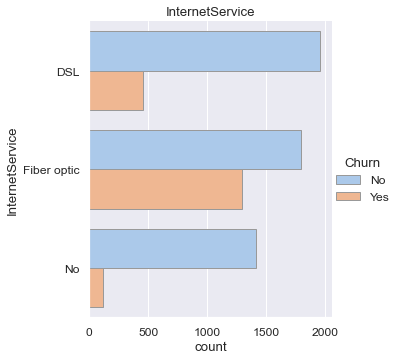

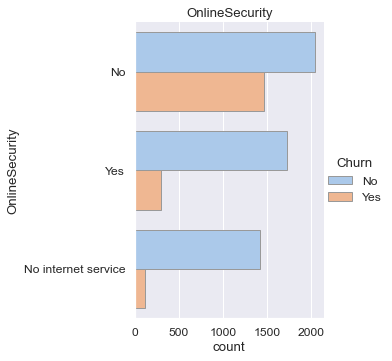

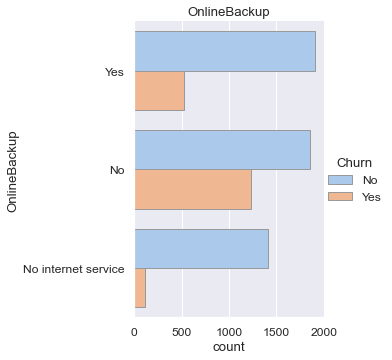

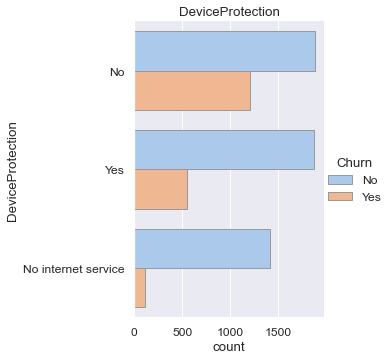

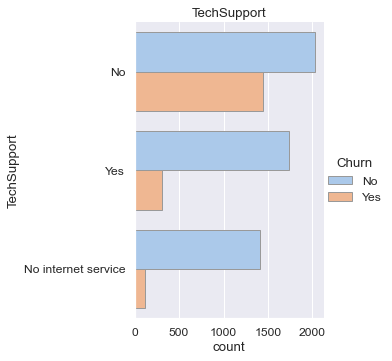

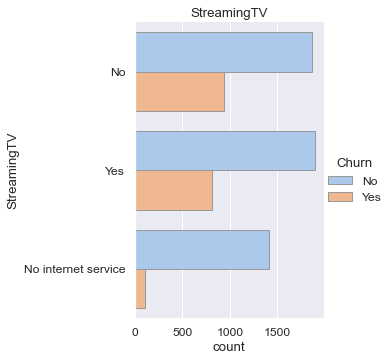

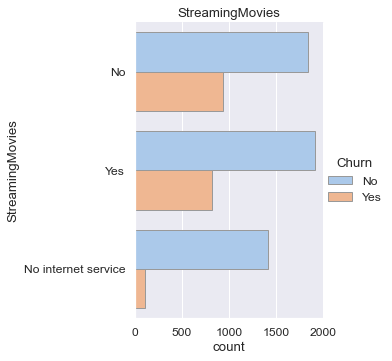

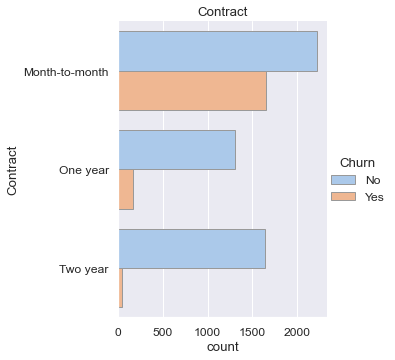

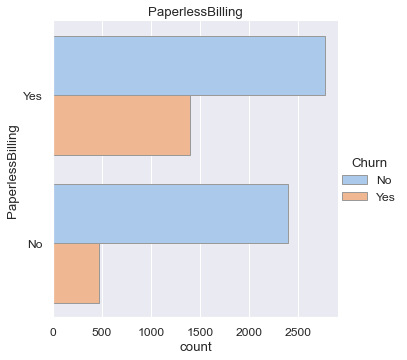

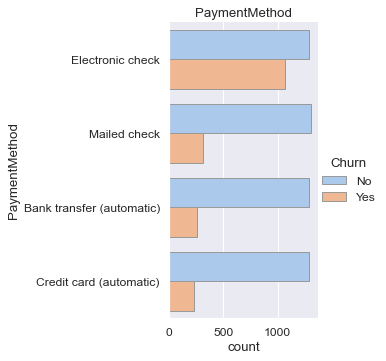

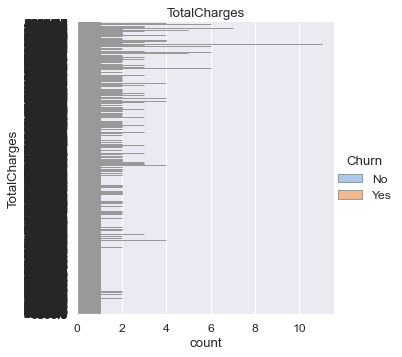

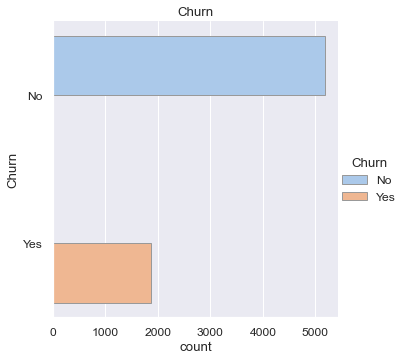

In [59]:
for col in cats_data:
    
    sns.catplot(y=col, hue="Churn", kind="count",
                palette="pastel", edgecolor=".6",
                data=data)
    plt.title(col)
    plt.show()
    print()

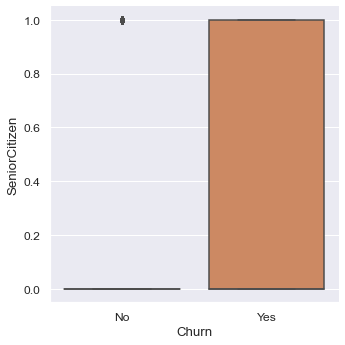

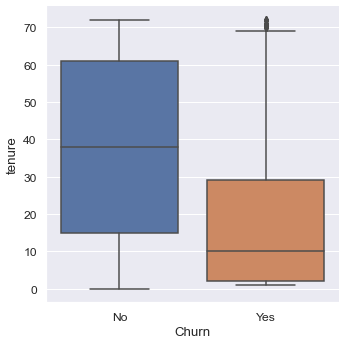

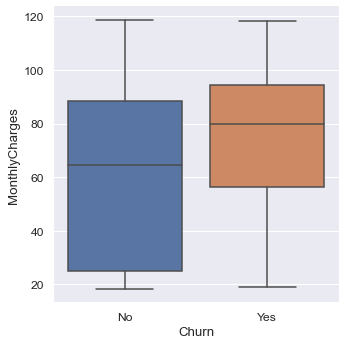

In [63]:
for col in nums_data:
    sns.catplot(x="Churn", y=col, 
                kind="box", data=data)

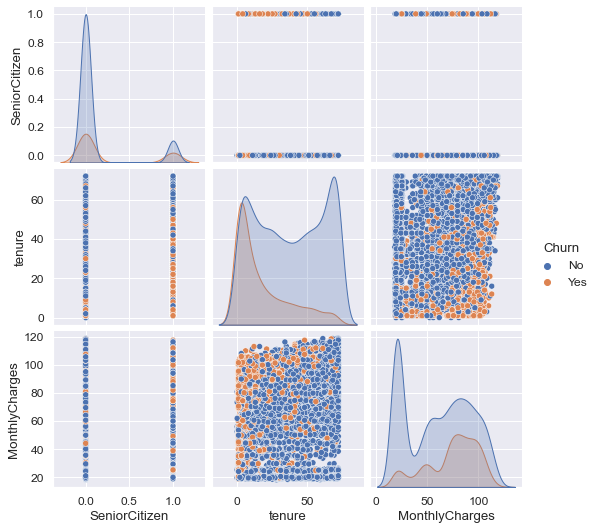

In [66]:
sns.pairplot(data=data,hue='Churn')

## Correlation Plots

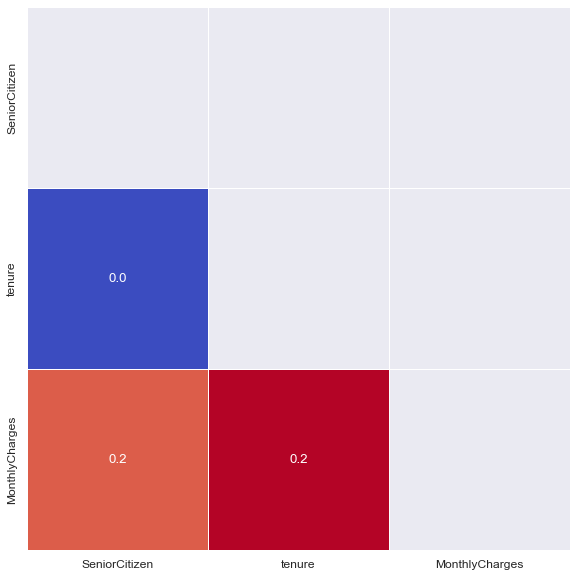

In [5]:
correlation(train=data)

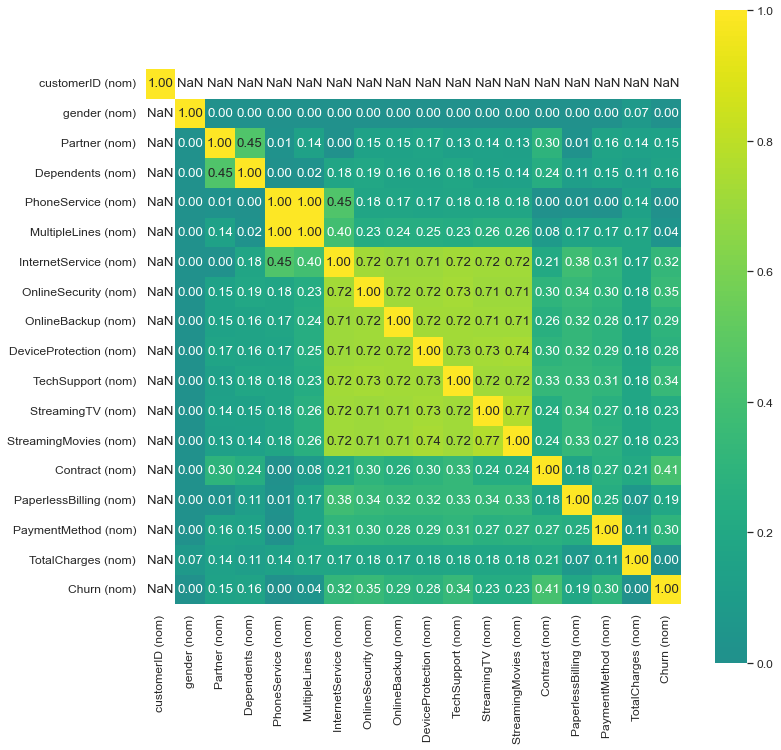

{'corr':                         customerID (nom)  gender (nom)  Partner (nom)  \
 customerID (nom)                     1.0      0.000000       0.000000   
 gender (nom)                         0.0      1.000000       0.000000   
 Partner (nom)                        0.0      0.000000       1.000000   
 Dependents (nom)                     0.0      0.000000       0.452241   
 PhoneService (nom)                   0.0      0.000000       0.012439   
 MultipleLines (nom)                  0.0      0.000000       0.142918   
 InternetService (nom)                0.0      0.000000       0.000000   
 OnlineSecurity (nom)                 0.0      0.002416       0.151083   
 OnlineBackup (nom)                   0.0      0.000000       0.152419   
 DeviceProtection (nom)               0.0      0.000000       0.165725   
 TechSupport (nom)                    0.0      0.000000       0.126533   
 StreamingTV (nom)                    0.0      0.000000       0.136314   
 StreamingMovies (nom)        

In [22]:
fig,ax = plt.subplots(figsize=(12,12))
associations(dataset=data[cats_data] ,numerical_columns=None,nan_replace_value='replace',cmap='viridis',mark_columns=True,ax=ax)
#fig.savefig("Num Cat kaggle house predictions.png")

In [ ]:
#contract is important
#partner&dependents .45
#PhoneService ,Multipleline 1.
#PhoneService,InterService 0.45
#contract and techsupport
#contract and partner
#tenure and contract

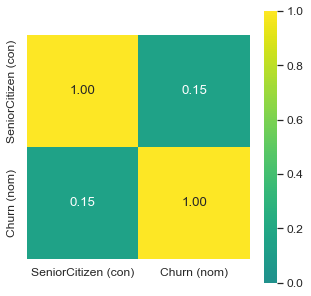

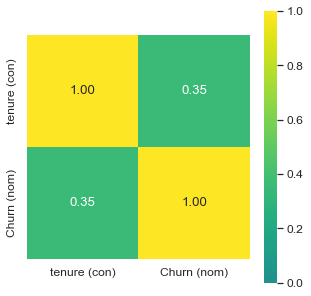

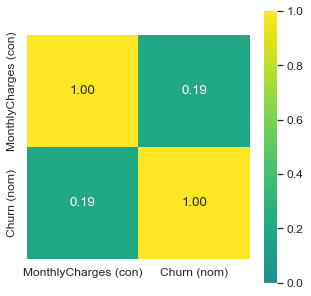

In [31]:
for col in nums_data:
    fig,ax = plt.subplots(figsize=(5,5))
    associations(dataset=data[[col,'Churn']] ,numerical_columns=col,nan_replace_value=0,cmap='viridis',mark_columns=True,ax=ax)
#fig.savefig("Num Cat kaggle house predictions.png")

In [69]:
data.TotalCharges = data.TotalCharges.replace(' ',np.nan)


,TotalCharges
Total,11.000000
Percent,0.156183


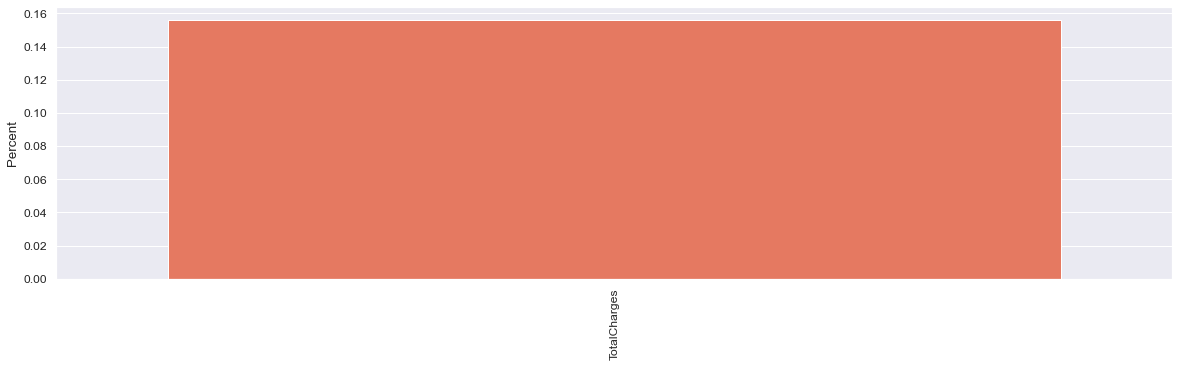

In [70]:
missing = missing_percentage(data)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

In [71]:
data.TotalCharges = data.TotalCharges.astype('float64')

In [ ]:
data.t

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

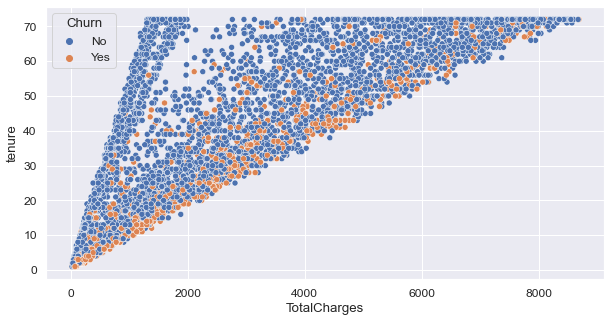

In [75]:
sns.scatterplot(data.TotalCharges,data.tenure ,hue = data.Churn)

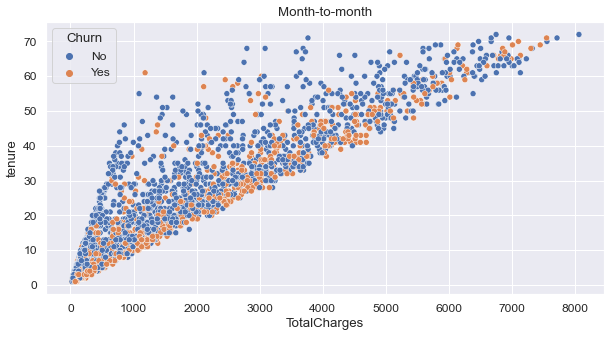

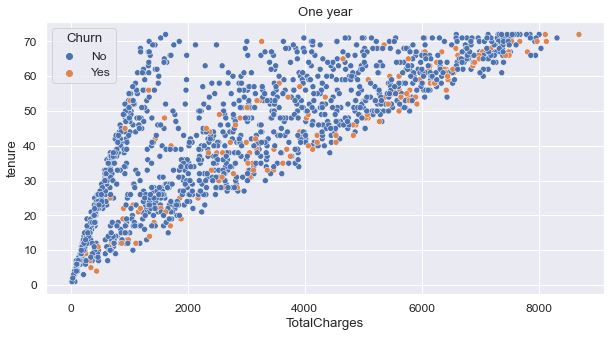

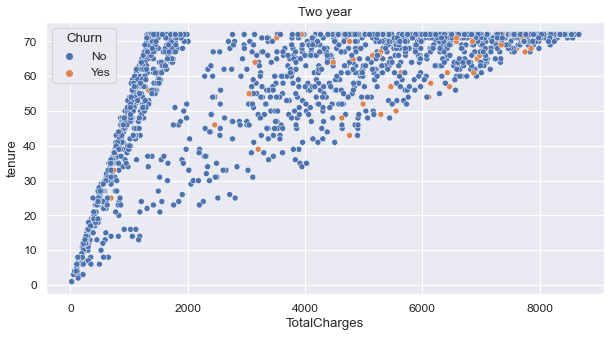

In [76]:
for gr_name , gr_df in data.groupby('Contract'):
    sns.scatterplot(gr_df.TotalCharges,gr_df.tenure ,hue = gr_df.Churn)
    plt.title(gr_name)
    plt.show()

In [77]:
global_churn = round((data.Churn=='Yes').sum()/data.shape[0],2)
global_churn

0.27

In [78]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

## Churn Rate and Risk Ratio 

In [89]:
for col in columns:  
    print(col)
    print()
    for gr_name , grp in data.groupby(col):
        #display(grp.Churn)
        print(f' global churn = {global_churn*100} %')
        churn_rate = (grp.Churn =='Yes').mean()
        risk_ratio =  churn_rate / global_churn
        _='_'
        print(f'churn rate for {col+_+str(gr_name)}  =  {np.round(churn_rate,2)*100} %')
        print(f'risk ratio for {col+_+str(gr_name)}  =  {np.round((risk_ratio-1)*100,2)} %')
        print('=====================')
        print()

gender

 global churn = 27.0 %
churn rate for gender_Female  =  27.0 %
risk ratio for gender_Female  =  -0.29 %

 global churn = 27.0 %
churn rate for gender_Male  =  26.0 %
risk ratio for gender_Male  =  -3.11 %

SeniorCitizen

 global churn = 27.0 %
churn rate for SeniorCitizen_0  =  24.0 %
risk ratio for SeniorCitizen_0  =  -12.57 %

 global churn = 27.0 %
churn rate for SeniorCitizen_1  =  42.0 %
risk ratio for SeniorCitizen_1  =  54.38 %

Partner

 global churn = 27.0 %
churn rate for Partner_No  =  33.0 %
risk ratio for Partner_No  =  22.07 %

 global churn = 27.0 %
churn rate for Partner_Yes  =  20.0 %
risk ratio for Partner_Yes  =  -27.17 %

Dependents

 global churn = 27.0 %
churn rate for Dependents_No  =  31.0 %
risk ratio for Dependents_No  =  15.85 %

 global churn = 27.0 %
churn rate for Dependents_Yes  =  15.0 %
risk ratio for Dependents_Yes  =  -42.78 %

PhoneService

 global churn = 27.0 %
churn rate for PhoneService_No  =  25.0 %
risk ratio for PhoneService_No  =  -7.